In [1]:


from DiffusionProject.Algorithms.Walks import QuantumWalk2D
from DiffusionProject.Algorithms.Walks import Backend
from DiffusionProject.Algorithms.Boundaries import Boundary
from DiffusionProject.Algorithms.Coins import HadamardCoin


running on device: CPU


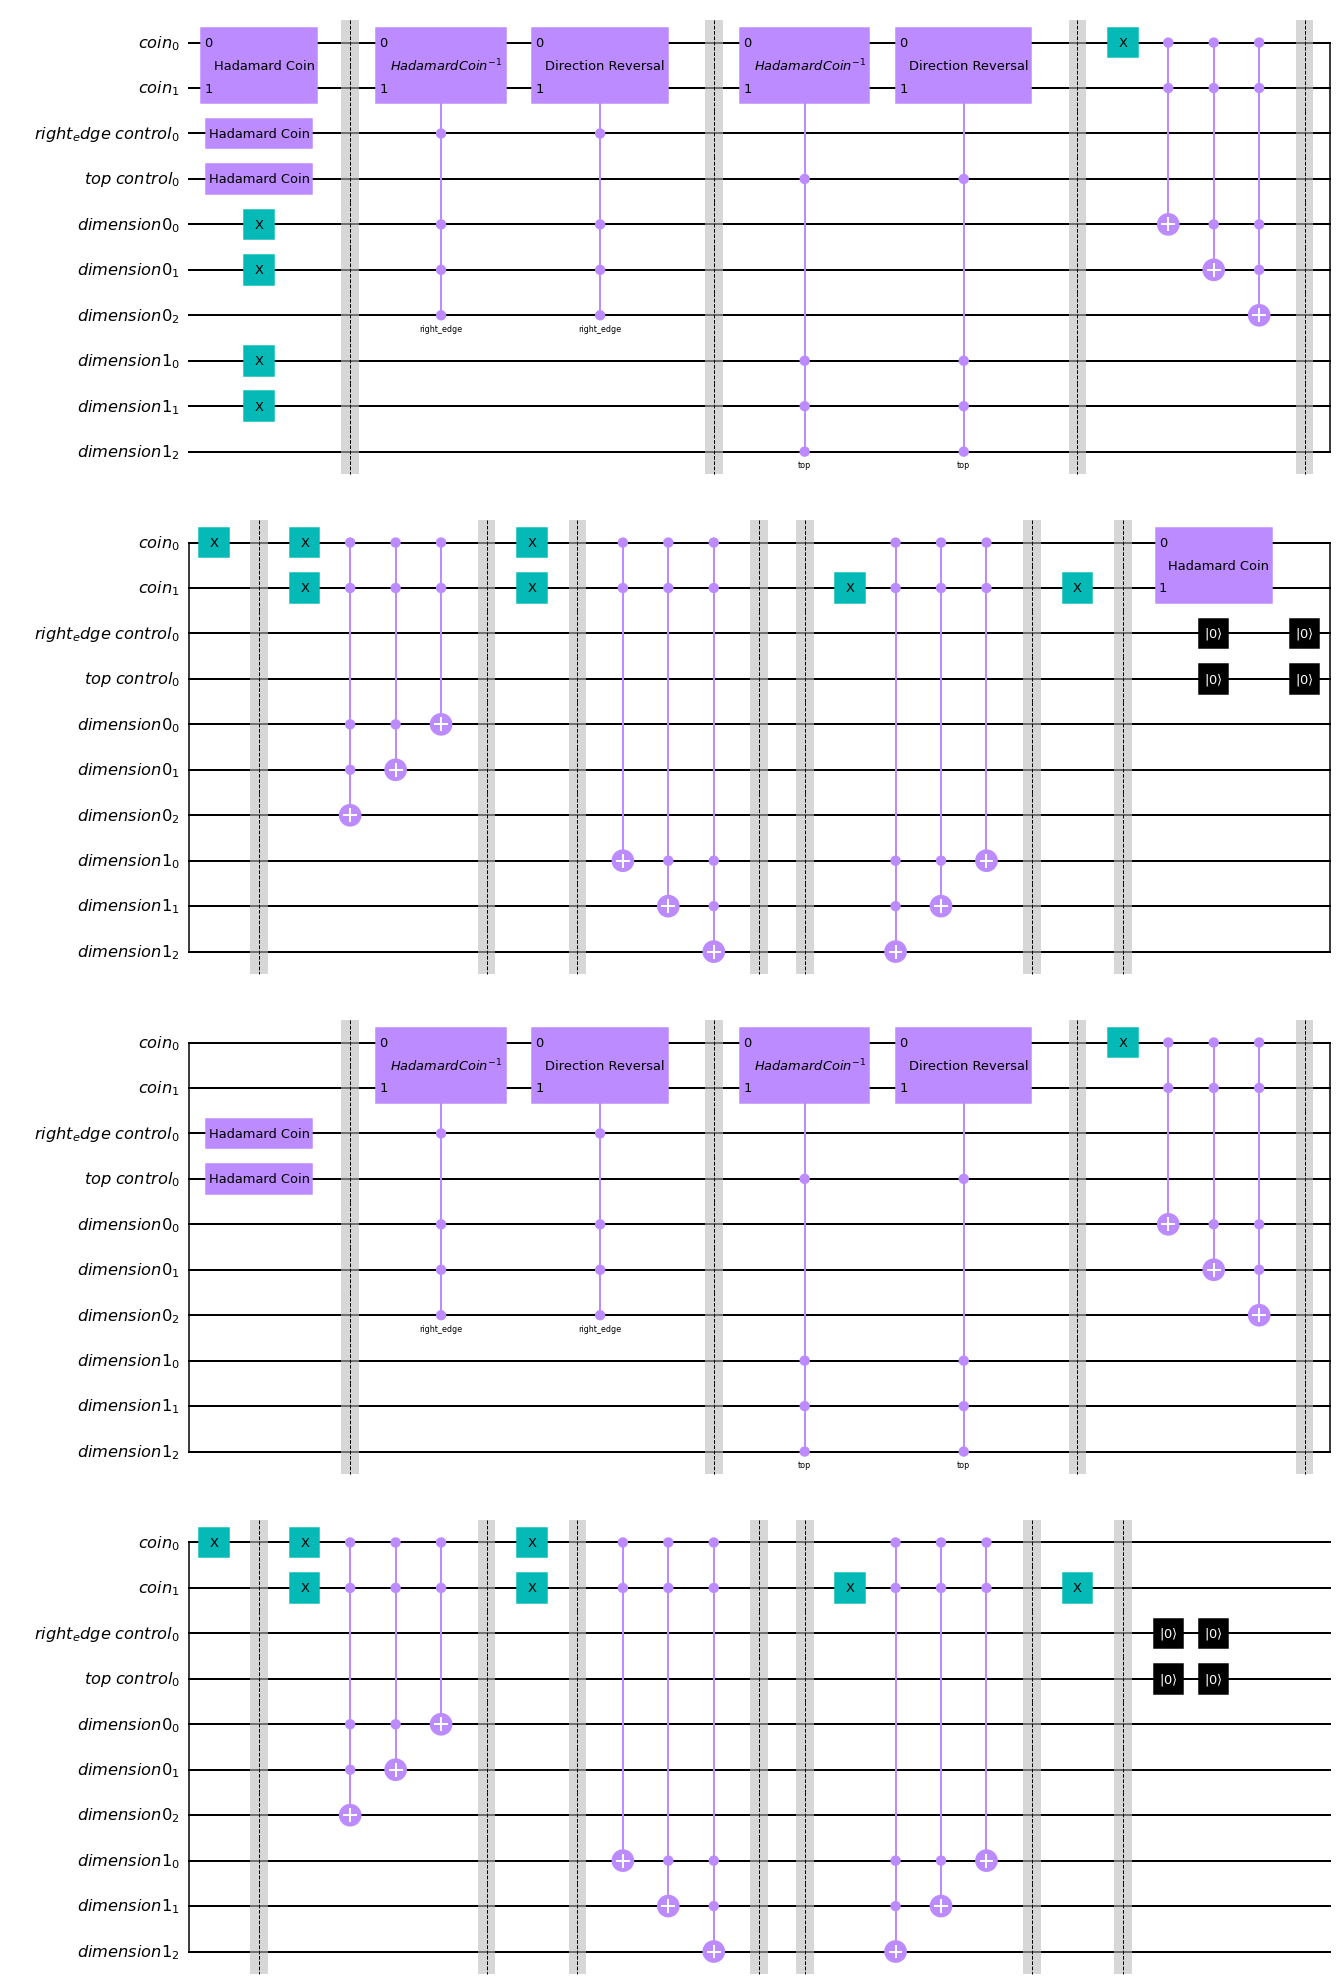

In [2]:
BACKEND = Backend()
boundary_right_edge = Boundary("111",label="right_edge", dimension = 0,ctrl=HadamardCoin(1))
boundary_top = Boundary("111",label="top", dimension= 1,ctrl=HadamardCoin(1))
walk = QuantumWalk2D(BACKEND,[3,3],initial_states=["011","011"],coin_class=HadamardCoin, boundaries=[boundary_right_edge, boundary_top])
walk.step()
walk.step()

walk.quantum_circuit.draw('mpl')


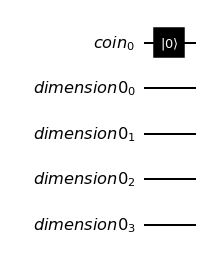

In [6]:
walk.quantum_circuit.draw('mpl')

In [ ]:
wa